In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist, fashion_mnist
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Часть 1: Автокодировщик
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
input_dim = x_train.shape[1]
encoding_dim = 32

input_layer = layers.Input(shape=(input_dim,))
encoder = layers.Dense(256, activation='relu')(input_layer)
encoder = layers.Dense(128, activation='relu')(encoder)
encoder = layers.Dense(64, activation='relu')(encoder)
encoder_output = layers.Dense(encoding_dim, activation='relu')(encoder)

decoder = layers.Dense(64, activation='relu')(encoder_output)
decoder = layers.Dense(128, activation='relu')(decoder)
decoder = layers.Dense(256, activation='relu')(decoder)
decoder_output = layers.Dense(input_dim, activation='sigmoid')(decoder)

autoencoder = keras.Model(inputs=input_layer, outputs=decoder_output)
autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
history = autoencoder.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

decoded_imgs = autoencoder.predict(x_test)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 0.0780 - val_loss: 0.0263
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0246 - val_loss: 0.0216
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0208 - val_loss: 0.0200
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0191 - val_loss: 0.0179
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0176 - val_loss: 0.0170
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0167 - val_loss: 0.0163
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0159 - val_loss: 0.0161
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0153 - val_loss: 0.0149
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0147 - val_loss: 0.0147
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 0.0143 - val_loss: 0.0145
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0140 - val_loss: 0.0138
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━

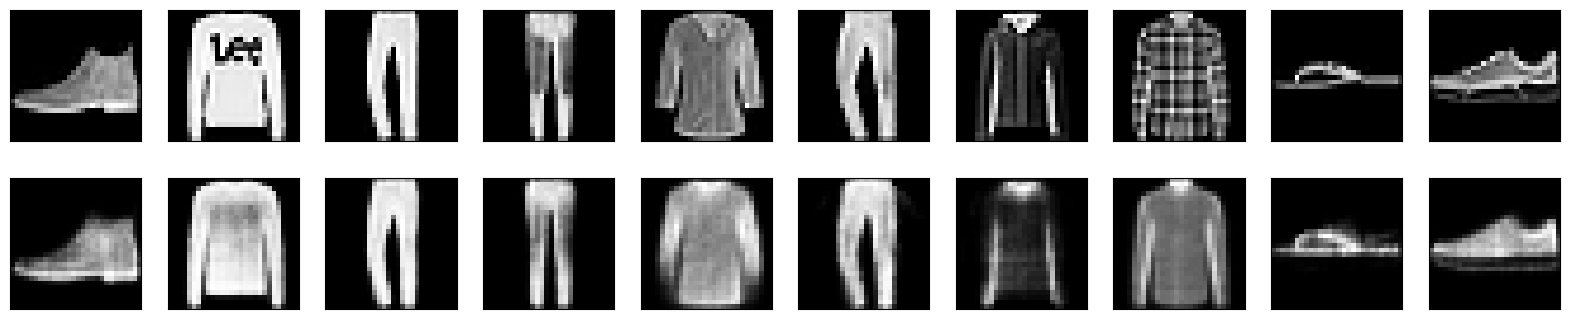

In [ ]:
plt.figure(figsize=(20, 4))
for i in range(10):
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, 10, i + 1 + 10)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [ ]:
latent_sizes = [128, 64, 32, 16, 8]
mse_scores = []

for size in latent_sizes:
    input_layer = layers.Input(shape=(input_dim,))
    encoder = layers.Dense(size, activation='relu')(input_layer)
    decoder = layers.Dense(input_dim, activation='sigmoid')(encoder)
    model = keras.Model(input_layer, decoder)
    model.compile(optimizer='adam', loss='mse')
    model.fit(x_train, x_train, epochs=30, batch_size=256, verbose=0)
    preds = model.predict(x_test)
    mse_scores.append(mean_squared_error(x_test, preds))

plt.plot(latent_sizes, mse_scores, marker='o')
plt.xlabel('Размер скрытого слоя')
plt.ylabel('MSE')
plt.title('Зависимость MSE от размера скрытого слоя')
plt.savefig('latent_space_mse.png')
plt.close()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
# Часть 2: Рекуррентные сети
def create_rnn():
    model = keras.Sequential([
        layers.SimpleRNN(64, activation='tanh', input_shape=(None, 1)),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def create_lstm():
    model = keras.Sequential([
        layers.LSTM(64, input_shape=(None, 1)),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def create_gru():
    model = keras.Sequential([
        layers.GRU(64, input_shape=(None, 1)),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def prepare_time_series(data, steps):
    X, y = [], []
    for i in range(len(data)-steps):
        X.append(data[i:(i+steps)])
        y.append(data[i+steps])
    return np.array(X), np.array(y)

In [ ]:
data = np.sin(np.arange(0, 1000, 0.1)) + np.random.normal(0, 0.1, 10000)
data = (data - np.min(data)) / (np.max(data) - np.min(data))

train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

steps = 20
X_train, y_train = prepare_time_series(train_data, steps)
X_test, y_test = prepare_time_series(test_data, steps)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
models = {
    'RNN': create_rnn(),
    'LSTM': create_lstm(),
    'GRU': create_gru()
}

history_dict = {}
predictions = {}
metrics = {}

for name, model in models.items():
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)
    history_dict[name] = history.history
    preds = model.predict(X_test)
    predictions[name] = preds
    metrics[name] = {
        'MSE': mean_squared_error(y_test, preds),
        'MAE': mean_absolute_error(y_test, preds),
        'R2': r2_score(y_test, preds)
    }

62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


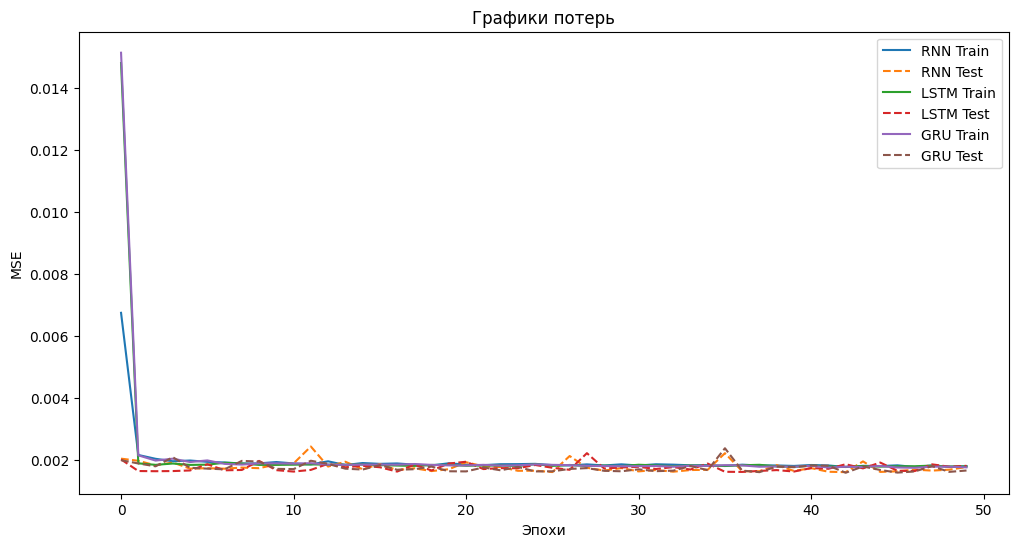

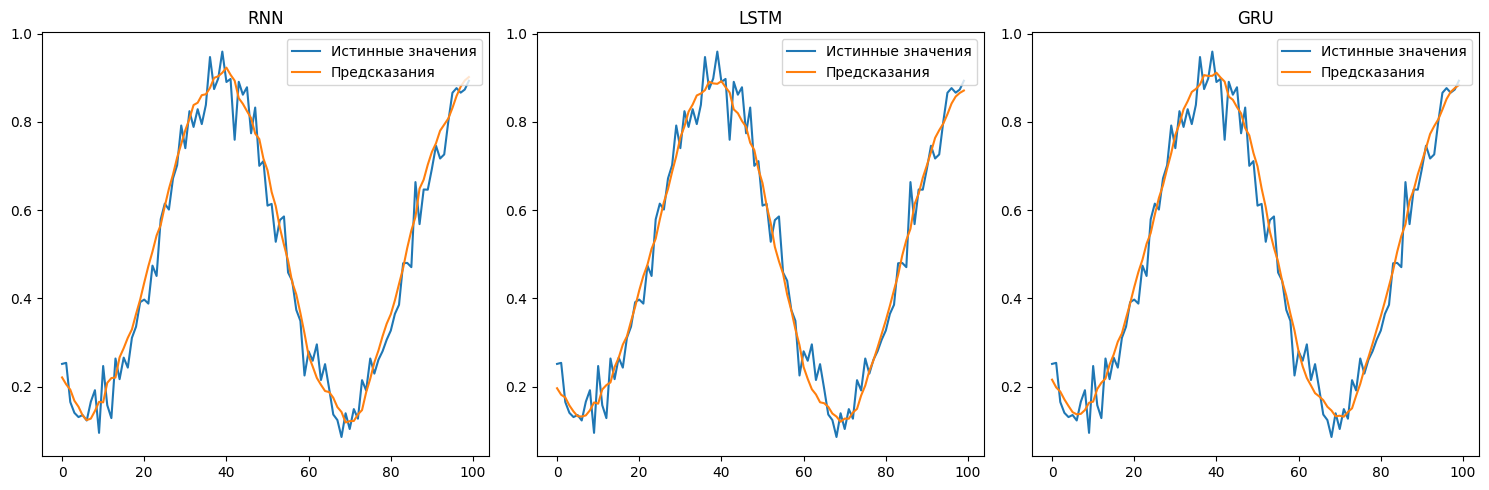

Метрики для рекуррентных сетей:

RNN:
MSE: 0.0018
MAE: 0.0334
R2: 0.9760

LSTM:
MSE: 0.0018
MAE: 0.0339
R2: 0.9755

GRU:
MSE: 0.0017
MAE: 0.0324
R2: 0.9775


In [ ]:
plt.figure(figsize=(12, 6))
for name in models.keys():
    plt.plot(history_dict[name]['loss'], label=f'{name} Train')
    plt.plot(history_dict[name]['val_loss'], label=f'{name} Test', linestyle='--')
plt.title('Графики потерь')
plt.xlabel('Эпохи')
plt.ylabel('MSE')
plt.legend()
plt.show()
plt.figure(figsize=(15, 5))
for i, (name, preds) in enumerate(predictions.items(), 1):
    plt.subplot(1, 3, i)
    plt.plot(y_test[:100], label='Истинные значения')
    plt.plot(preds[:100], label='Предсказания')
    plt.title(name)
    plt.legend()
plt.tight_layout()
plt.show()
print("Метрики для рекуррентных сетей:")
for name, metric in metrics.items():
    print(f"\n{name}:")
    for k, v in metric.items():
        print(f"{k}: {v:.4f}")